In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def sample_from_complex_distribution(n_samples):
    components = np.random.choice(3, size=n_samples, p=[0.3, 0.4, 0.3])
    
    means = [-3.5, 0.0, 6.5]
    stds = [1.5, 0.8, 0.2]
    
    samples = np.zeros(n_samples)
    
    for i in range(n_samples):
        component = components[i]
        samples[i] = np.random.normal(loc=means[component], scale=stds[component])
    
    return samples

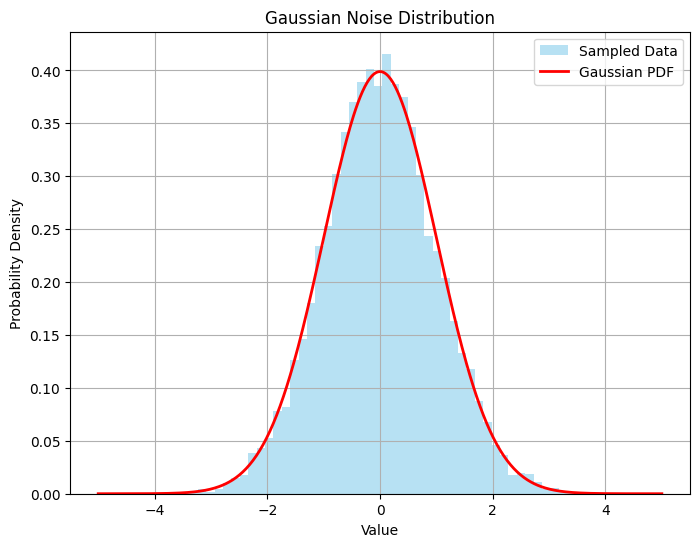

In [3]:
n_samples = 10000
samples = np.random.normal(loc=0, scale=1, size=n_samples)

plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Sampled Data')

x = np.linspace(-5, 5, 500)
pdf = stats.norm.pdf(x, loc=0, scale=1)  # Standard normal PDF

plt.plot(x, pdf, 'r', lw=2, label='Gaussian PDF')

plt.title("Gaussian Noise Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

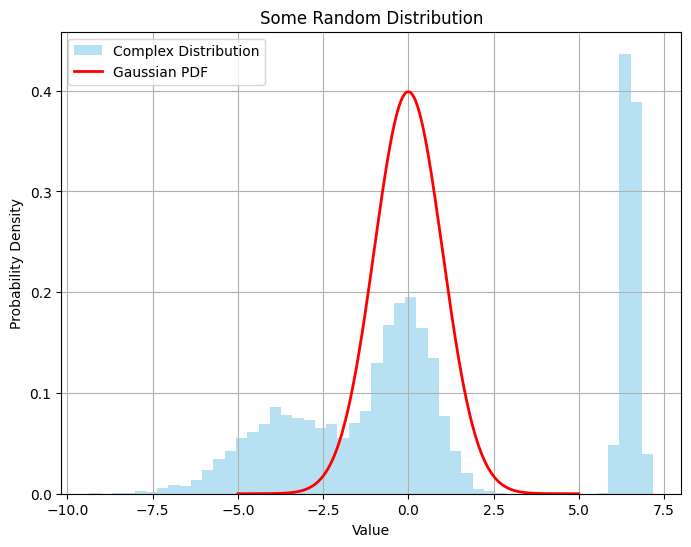

In [4]:
n_samples = 10000
samples = sample_from_complex_distribution(n_samples)

plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', label='Complex Distribution')

x = np.linspace(-5, 5, 500)
pdf = stats.norm.pdf(x, loc=0, scale=1)  # Standard normal PDF

plt.plot(x, pdf, 'r', lw=2, label='Gaussian PDF')

plt.title("Some Random Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

### Transition Function

x_t = alpha * x_t_minus_1 + beta * noise

In [5]:
def transition_function(x, alpha, beta):
    noise = np.random.normal(loc=0, scale=1, size=x.shape)
    return alpha * x + beta * noise

In [6]:
def get_latents(alpha, beta, num_transitions=9, linear_transition=False):
    b_t = 0.02
    step = (b_t - beta) / num_transitions
    x_t_minus_1 = samples.copy()
    latents = [x_t_minus_1]

    for i in range(num_transitions):
        if linear_transition:
            beta = beta + step * i
            alpha = np.sqrt(1 - beta)
            x_t = transition_function(x_t_minus_1, alpha, beta)
        else:
            x_t = transition_function(x_t_minus_1, alpha, beta)
        latents.append(x_t)
        x_t_minus_1 = x_t
    
    return latents
    

In [7]:
def plot_latents(alpha, beta, num_transitions=9):
    latents = get_latents(alpha, beta, num_transitions)
    n_plots = len(latents)
    n_cols = 5 
    n_rows = (n_plots + n_cols - 1) // n_cols 
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), sharey=True)
    axs = np.array(axs).reshape(n_rows, n_cols)  
    
    for i in range(n_rows * n_cols):
        row, col = divmod(i, n_cols)
        ax = axs[row, col]
        
        if i < n_plots:
            ax.hist(latents[i], bins=50, density=True, alpha=0.9, color='skyblue')
            ax.set_title(f't = {i}')
            ax.set_xlabel("Value")
            ax.set_ylabel("Density")
            ax.set_xlim(-8, 8)
            ax.tick_params(axis='y', labelleft=True)
        else:
            ax.axis('off')  

    plt.tight_layout()
    plt.show()

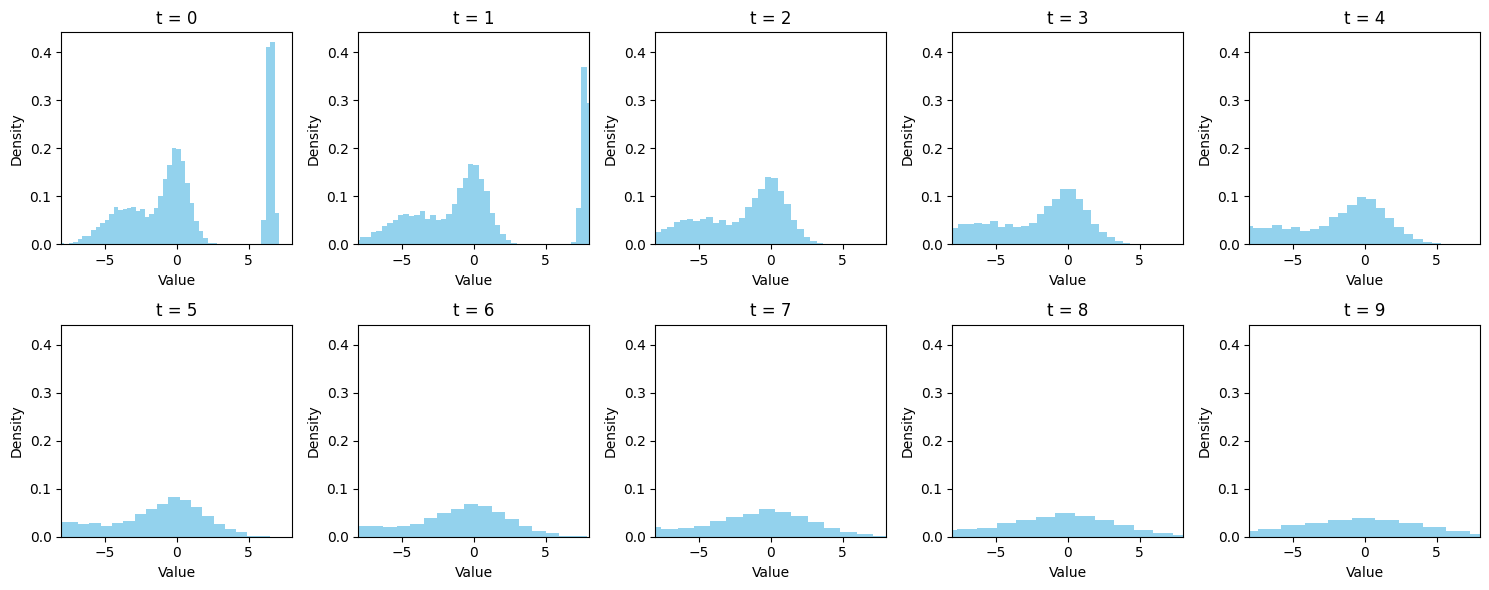

In [8]:
plot_latents(alpha=1.2, beta=0.1)

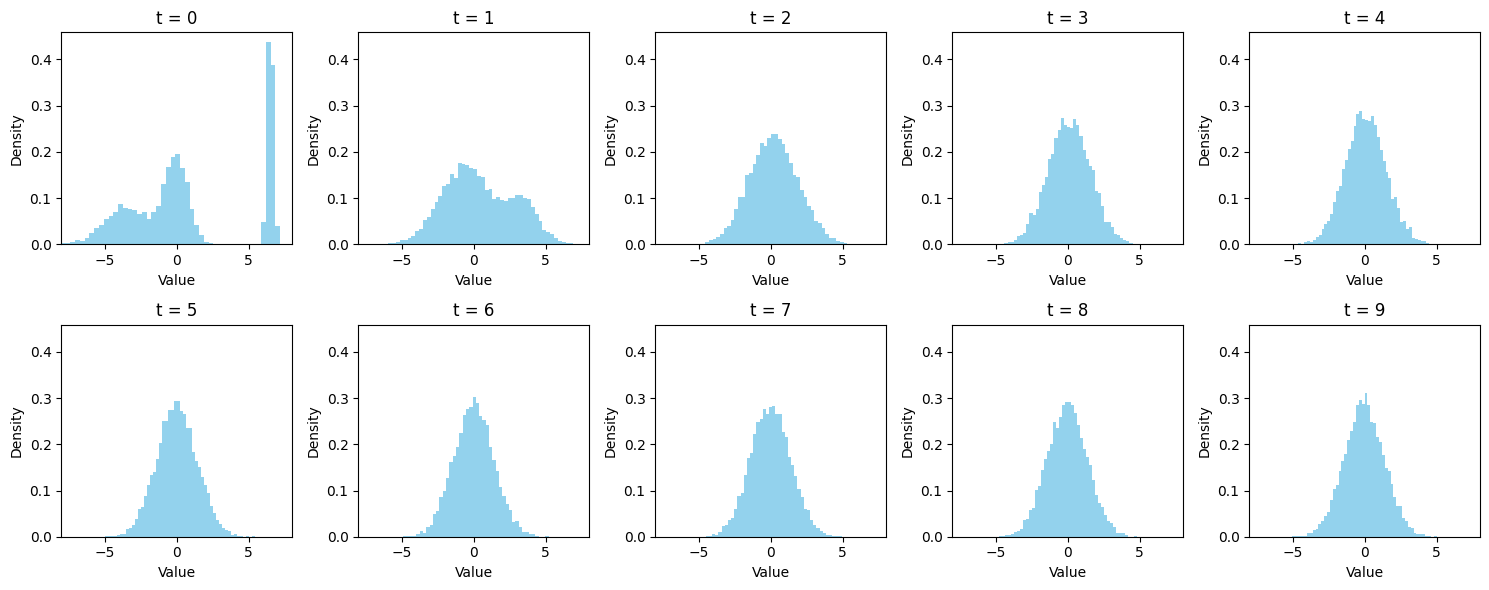

In [8]:
plot_latents(alpha=0.5, beta=1.2)

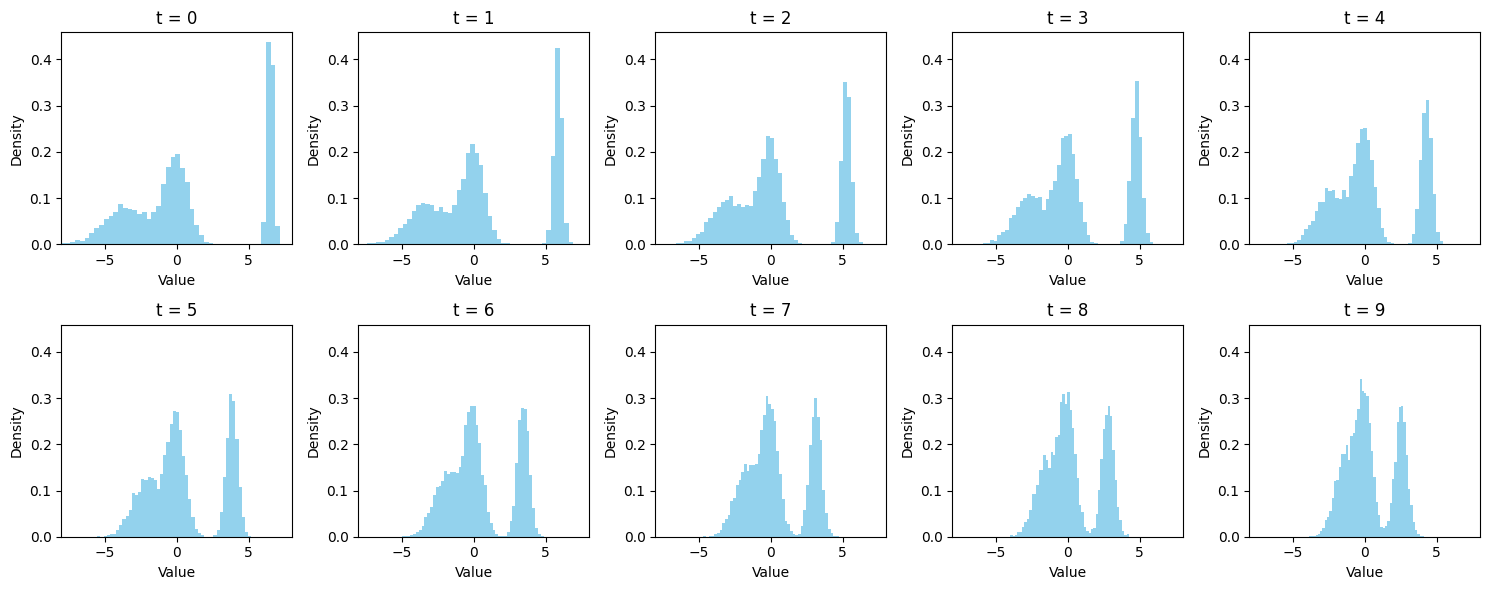

In [9]:
plot_latents(alpha=0.9, beta=0.2, num_transitions=9)

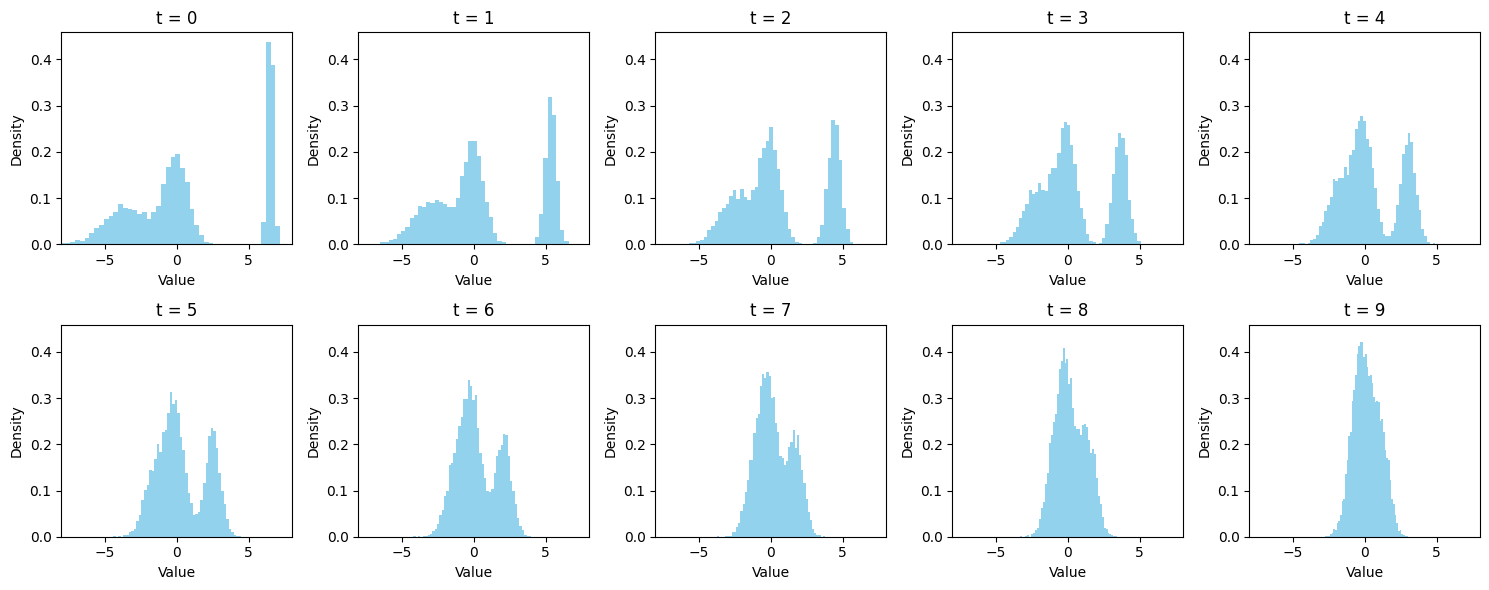

In [10]:
beta = np.sqrt(0.1)
alpha = np.sqrt(1 - beta)
plot_latents(alpha, beta)

In [12]:
def plot_variance(beta, num_transitions=50, linear_transition=False):
    alpha = np.sqrt(1 - beta)
    latents = get_latents(alpha, beta, num_transitions=num_transitions, linear_transition=linear_transition)
    variances = [np.var(latent) for latent in latents]
    plt.figure(figsize=(8, 5))
    plt.plot(range(num_transitions + 1), variances, marker='', linestyle='-')
    plt.xlabel("Time Step")
    plt.ylabel("Variance")
    plt.title("Variance of Latents Over Time")
    plt.grid(True)
    plt.show()

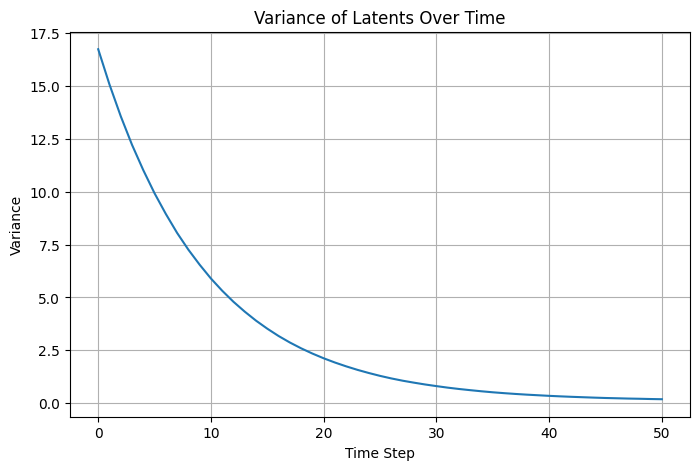

In [13]:
plot_variance(beta=0.1, num_transitions=50, linear_transition=False)

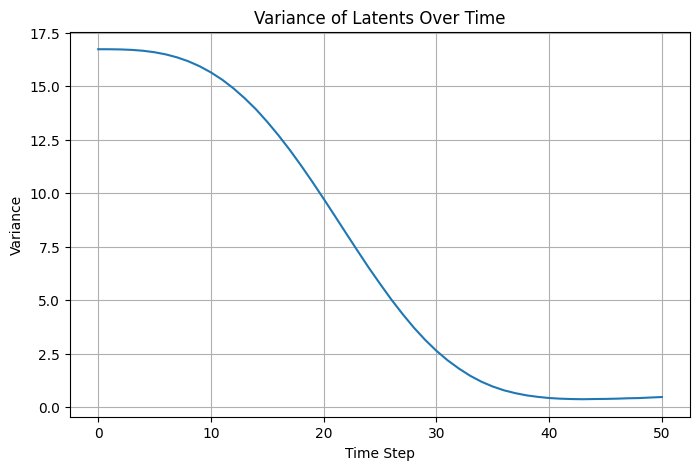

In [14]:
plot_variance(beta=0.0001, num_transitions=50, linear_transition=True)